# Project: Wrangling and Analyze Data (WeRateDogs)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>    
<li><a href="#accessing">Data Accessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About Dataset

The dataset to be wrangled (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs, which is a Twitter account that rates people's dogs with a humorous comment about the dog. In addition to the tweet archive dataset, we'll be working with an additional dataset gotten from "Twitter API" and "Image prediction file".

### Importation of Packages

In [1]:
#Import the libraries needed for this project.
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
from timeit import default_timer as timer

<a id='gathering'></a>
## Data Gathering

>Here we'll load each of the dataset we will be using and save them with a unique name.
### Loading the dataset

In [2]:
# WeRateDogs Twitter archive file obtained as a csv file.
data1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Requesting tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(r.content)

In [4]:
data2 = pd.read_csv('image-predictions.tsv', sep = '\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Reading tweet json data
data3 = pd.read_json('tweet-json.txt', lines=True)

<a id='accessing'></a>
## Assessing Data

In this section, we will be assessing each dataset visually and programmatically checking for quality and tidiness issues.

##### Visually assessing the data

In [6]:
# Checking sample of the Twitter archive file
data1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# Checking sample of the image predictions
data2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Checking sample of the tweet_json 
data3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


##### Programmatically assessing the data

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [12]:
data1.timestamp.value_counts()

2015-11-19 21:22:56 +0000    1
2015-12-06 01:48:12 +0000    1
2016-02-13 16:50:04 +0000    1
2016-07-16 22:55:55 +0000    1
2016-03-05 04:17:02 +0000    1
2016-02-24 17:04:07 +0000    1
2017-01-14 17:00:24 +0000    1
2016-02-03 16:49:55 +0000    1
2017-04-10 16:00:07 +0000    1
2015-11-28 03:49:14 +0000    1
2015-12-11 00:35:44 +0000    1
2016-06-12 00:44:30 +0000    1
2016-04-04 00:55:01 +0000    1
2016-09-07 15:44:53 +0000    1
2015-12-15 17:11:09 +0000    1
2016-07-31 01:50:18 +0000    1
2016-07-30 17:51:13 +0000    1
2016-04-15 15:44:11 +0000    1
2016-08-24 21:02:45 +0000    1
2016-05-09 00:11:16 +0000    1
2016-02-11 00:18:49 +0000    1
2016-06-07 00:36:02 +0000    1
2017-01-28 01:04:51 +0000    1
2017-07-24 00:19:32 +0000    1
2017-03-07 03:22:35 +0000    1
2016-01-04 03:50:08 +0000    1
2015-12-25 19:39:43 +0000    1
2017-02-05 01:04:17 +0000    1
2017-07-01 21:49:04 +0000    1
2016-07-01 01:40:41 +0000    1
                            ..
2016-03-08 20:09:54 +0000    1
2017-01-

In [13]:
#Observing the different sources of tweets present
data1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
# Observing the unique dog names present
data1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

#### Observation

>Looking at the unique names for dogs, we observe that there are some entries that were wrongly extracted such as; (such,a, not, my, by, one, etc.). We need to check from the tweet to see if the names were actually mentioned and have them replaced or removed entirely if not. 

- We'll be checking the unappropriate names we found individually and checking their respective tweets.

In [15]:
error_name=data1[data1.name=='such'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba


In [16]:
error_name=data1[data1.name=='a'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
----------
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
----------
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
----------
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
----------
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
----------
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
----------
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 wo

In [17]:
error_name=data1[data1.name=='not'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
----------
What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX


In [18]:
error_name=data1[data1.name=='one'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
----------
This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k
----------
This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd
----------
This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd


In [19]:
error_name=data1[data1.name=='by'].text
for i, entry in enumerate(error_name):
    print(entry)

This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE


In [20]:
error_name=data1[data1.name=='my'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB


In [21]:
error_name=data1[data1.name=='O'].text
for i, entry in enumerate(error_name):
    print(entry)

This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC


In [22]:
error_name=data1[data1.name=='Al'].text
for i, entry in enumerate(error_name):
    print(entry)

Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV


In [23]:
error_name=data1[data1.name=='his'].text
text_sample_size = error_name.size - 1
for i, entry in enumerate(error_name):
    print(entry)
    if i != text_sample_size:
        print('----------')

That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7


#### Observation

>We observed after checking some of the unappropriate names found, that a number of them does not have the actual dog name in the tweet which the names were extracted from. However, names such as (O, Al, my, and his) has the actual dog name in the tweet, so we would have to rename them to the correct name and make the other observations null value.

In [24]:
# Checking for entries not related to dog.
# After going through some of the tweets, a pattern was observed -
# between entries that are not dog related. This pattern was used to filter them and 
# they will be dropped. 

unrelated_data = data1[data1.text.str.match('.* only .* dogs')].text
text_sample_size = unrelated_data.size - 1
for i, entry in enumerate(unrelated_data):
    print(entry)
    if i != text_sample_size:
        print('----------')

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
----------
Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E
----------
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
----------
I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2
----------
RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
----------
Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ
----------
Oh my this spooked me up. We only r

----------
Meet Sammy. At first I was like "that's a snowflake. we only rate dogs," but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh
----------
Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC
----------
I know everyone's excited for Christmas but that doesn't mean you can send in reindeer. We only rate dogs... 8/10 https://t.co/eWjWgbOCYL
----------
Guys this was terrifying. Really spooked me up. We don't rate ghosts. We rate dogs. Please only send dogs... 9/10 https://t.co/EJImi1udYb
----------
Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI
----------
Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj
----------
C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https:/

In [25]:
# Checking to see how many of non dog related entries we have
data1[data1.text.str.match('.* only .* dogs')].text.count()

74

In [26]:
# Checking retweeted entries
data1.retweeted_status_id.value_counts().sum()

181

#### Observation

>There are 181 retweets in the data. These entries needs to be dropped as retweets are not required.

In [27]:
# Checking text that has decimal ratings.
decimal_value = data1[data1.text.str.contains(r"(\d+\.\d*\/\d+)")].text
text_sample_size = decimal_value.size - 1
for i, entry in enumerate(decimal_value):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
----------
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
----------
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
----------
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
----------
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
----------
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [28]:
# Observing the text column and the numerator entered.
data1[data1.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


#### Observation

> We discover in the text column that some ratings are in fact decimals and looking through our rating_numerator coulmn, all the entries are integers. Therefore, we need to replace the rating_numerator column with the actual decimal value and convert them to float.

- After accessing the datasets, some issues that needs to be addressed were discovered. This issues are highlighted below. We'll then proceed to cleaning this dataset to make it suitable for analysis.

### Quality issues
1. We need to strip and convert the timestamp to datetime and also change the tweet_id to string.

2. The tweet source is quite unclear. Each tweet source needs to be extracted and converted to categorical datatype.

3. Some names are unrealistic, this needs to removed or replaced.

4. Only original tweets that are actual dog ratings are needed. Therefore, retweets and other kind of tweets need to be deleted.

5. Convert ratings to float and Include decimal ratings.

6. Drop rows without image.

7. There are 3 predictions for the dog breed in the "image_predictions_df" We can select the best prediction and put them in a column labelled "dog_breed".

8. There are certain columns that are not essential. These columns need to be dropped.

### Tidiness issues
1. Just one dataframe is needed. Therefore, we need to merge the three dataframes into one.

2. The columns "Doggo", "floofer", "pupper", and "puppo" need to be merged into a single column labelled "dog_type".


<a id='cleaning'></a>
## Cleaning Data

In this section, we'll be cleaning **all** of the issues documented while assessing and making the dataset suitable for analysis. 



In [29]:
# Make copies of original pieces of data
data1_clean = data1.copy()
data2_clean = data2.copy()
data3_clean = data3.copy()

### 1: Convert timestamp to datetime and also change the tweet_id to string

#### Define

Timestamp needs to be stripped and converted to the correct datatype (datetime). Also, the datatype for tweet_id is currently integer, this needs to be changed to string.

#### Code

In [30]:
#We strip the extra numbers "+0000" fron timestamp column
data1_clean.timestamp = data1_clean.timestamp.str.strip('+0000')

In [31]:
# We convert the datatype
data1_clean.timestamp = pd.to_datetime(data1_clean.timestamp)

In [32]:
#Convert tweet_id from integer to string
data1_clean.tweet_id = data1_clean.tweet_id.astype('str')
data2_clean.tweet_id = data2_clean.tweet_id.astype('str')

#### Test

In [33]:
data1_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [34]:
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [35]:
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [36]:
data2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 2: Extract tweet source

#### Define

The tweet source is mumbled up, so we need to extract the source from the source text and convert the column to categoricala data.

#### Code

In [37]:
# We are going to use the "re library" with findall function and extract 
# real source from tags > ...... <
data1_clean['source'] = data1_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])


In [38]:
# We convert the column "source" to categorical datatype
data1_clean['source'] = data1_clean['source'].astype('category')

#### Test

In [39]:
data1_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [40]:
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), 

### 3: Remove or replace unrealistic names

#### Define
Some names are found in the names column that are unrealistic for a dog name. Names such as "such,a, not, my, by, one, etc." are not actual dog names, and the actual name was not found in the tweet. So we need to change them to null values. However, names like "O, Al, my, and his" have the actual names in the tweet. We'll therefore be replacing them.

#### Code

In [41]:
# We observed that the first letter of these unrealistic names are in lowercase. 
# We will then use this to change them into 'None'. 
name=[]

#function iterates through name column checking if the first letter is lowercase.
def unrealistic_name(row):
    if row['name'][0].islower() == True:
        name.append('None')
    else:
        name.append(row['name'])
        
data1_clean.apply(unrealistic_name, axis=1)

#We add the names list to the dataframe
data1_clean['name'] = name


In [42]:
# We replace the names "O, Al, his, and my" to their actual names found in the tweet.
data1_clean.name.replace(['O', 'Al', 'his', 'my'], ['O\'Malley' ,'Al Cabone', 'Quizno', 'Zoey'], inplace=True)

#### Test

In [43]:
data1_clean['name'].value_counts()

None          854
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
Toby            7
Daisy           7
Bailey          7
Buddy           7
Stanley         6
Rusty           6
Jack            6
Leo             6
Dave            6
Koda            6
Oscar           6
Scout           6
Milo            6
Bella           6
Jax             6
Oakley          5
Finn            5
Sammy           5
George          5
             ... 
Trip            1
Al Cabone       1
Tayzie          1
Birf            1
Christoper      1
Bronte          1
Carper          1
Rudy            1
Ralf            1
Lassie          1
Eevee           1
Ambrose         1
Mauve           1
Rodman          1
Sparky          1
Kathmandu       1
Jordy           1
Daniel          1
Hamrick         1
Jiminus         1
Aja             1
Jay             1
Maude           1
Gòrdón          1
Josep     

In [44]:
#Checking to see the name "Al" no longer exist
data1_clean[data1_clean.name=='Al']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [45]:
#Checking that "Al" has indeed be changed to "Al Cabone"
data1_clean[data1_clean.name=='Al Cabone']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12,Twitter for iPhone,Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al Cabone,None,None,None,None


### 4: Remove non-dog entries and retweets

#### Define

Only original tweets (no retweets) that are actual dog ratings are needed. Therefore, retweets and other kind of tweets need to be dropped. 

After going through some of the tweets, a pattern was observed between entries that are not dog related. This pattern was used to filter them.  

There are 181 retweets, which can be seen in the column "retweeted_status_id". We drop the non-null rows to remove the retweets.


#### Code

In [46]:
# We use the pattern discovered "We only rate dogs" and "I only rate dogs" to filter
# and drop entries that are not dog related.
data1_clean = data1_clean[data1_clean["text"].str.contains('.* only .* dogs') == False]

In [47]:
# Using the column "retweeted_status_id", we observe 181 retweeted entries. 
#We will be dropping the non-null entries
data1_clean = data1_clean[data1_clean.retweeted_status_id.isnull()]

#### Test

In [48]:
# Checking to see if we still have non dog related entries
data1_clean[data1_clean.text.str.match('.* only .* dogs')].text.count()

0

In [49]:
# Checking to see if we still have retweets
data1_clean.retweeted_status_id.value_counts().sum()

0

### 5: Convert ratings to float and Include decimal ratings.

#### Define

There are some ratings in the text column that are actually decimals. We need to add the correct decimal figure to the numerator column and convert the column as well as the denominator to datatype "float".

#### Code

In [50]:
data1_clean[data1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [51]:
data1_clean.rating_numerator = data1_clean.rating_numerator.astype('float')

In [52]:
data1_clean.rating_denominator = data1_clean.rating_denominator.astype('float')

In [87]:
# Replacing the entries in the numerator column with the actual decimal value
data1_clean.at[[45,695,763,1689,1712],'rating_numerator']=['13.5','9.75','11.27','9.5','11.26']

#### Test

In [54]:
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2110 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2110 non-null datetime64[ns]
source                        2110 non-null category
text                          2110 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2052 non-null object
rating_numerator              2110 non-null object
rating_denominator            2110 non-null float64
name                          2110 non-null object
doggo                         2110 non-null object
floofer                       2110 non-null object
pupper                        2110 non-null object
puppo                         2110 non-null object
dtypes: category(1), dat

In [55]:
data1_clean[data1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.5
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.5
1712,Here we have uncovered an entire battalion of ...,11.26


### 1: Merge the three data set into one 
##### (Tidiness Issue)

#### Define

Just one dataframe is needed for analysis. Therefore, we need to merge the three datasets into one, using "tweet_id".

#### Code

In [56]:
# Merging the "twitter achive data" and the "image prediction data" using "tweet_id"
merged_data1 = pd.merge(data1_clean, data2_clean, on=['tweet_id','tweet_id'],how='left')

In [57]:
# Since we are using "tweet_id" to merge the datasets, we would need to replace 
#the column "id" in the "tweet json" data to "tweet_id"
data3_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [58]:
# We then need to change the datatype from integer to string also
data3_clean.tweet_id = data3_clean.tweet_id.astype('str')

In [59]:
# We can now merge the newly created "merged_data1" with "tweet json" data
merged_data = pd.merge(merged_data1, data3_clean, on=['tweet_id','tweet_id'],how='left') 

#### Test

In [60]:
merged_data.rating_numerator = merged_data.rating_numerator.astype('float')

In [61]:
# Checking to see the two datasets has merged
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2109
Data columns (total 28 columns):
tweet_id                      2110 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2110 non-null datetime64[ns]
source                        2110 non-null category
text                          2110 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2052 non-null object
rating_numerator              2110 non-null object
rating_denominator            2110 non-null float64
name                          2110 non-null object
doggo                         2110 non-null object
floofer                       2110 non-null object
pupper                        2110 non-null object
puppo                         2110 non-null object
jpg_url                 

In [62]:
# Checking to see that the column "id" has changed to "tweet_id" and the datatype
# has changed to string also 
data3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

In [63]:
# Checking to see we now have all three dataset in one dataframe "merged_data"
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2109
Data columns (total 58 columns):
tweet_id                         2110 non-null object
in_reply_to_status_id_x          77 non-null float64
in_reply_to_user_id_x            77 non-null float64
timestamp                        2110 non-null datetime64[ns]
source_x                         2110 non-null category
text                             2110 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    2052 non-null object
rating_numerator                 2110 non-null float64
rating_denominator               2110 non-null float64
name                             2110 non-null object
doggo                            2110 non-null object
floofer                          2110 non-null object
pupper                           2110 non-null object
puppo                     

### 6: Drop rows without image

#### Define

We only need original ratings that have images. After dropping entries that are  retweets and are non dog related, we'll use the column "jpg_url" to drop entries that does not have images.

#### Code

In [64]:
merged_data = merged_data[merged_data.jpg_url.notnull()]

#### Test

In [65]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2109
Data columns (total 58 columns):
tweet_id                         1930 non-null object
in_reply_to_status_id_x          22 non-null float64
in_reply_to_user_id_x            22 non-null float64
timestamp                        1930 non-null datetime64[ns]
source_x                         1930 non-null category
text                             1930 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1930 non-null object
rating_numerator                 1930 non-null float64
rating_denominator               1930 non-null float64
name                             1930 non-null object
doggo                            1930 non-null object
floofer                          1930 non-null object
pupper                           1930 non-null object
puppo                     

### 7: Select the best prediction

#### Define

We have three predictions with their respective confidence level. We'll be selecting the best of these predictions. 

#### Code

In [66]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('NaN')
        confidence.append(0)
        
# call function using pandas apply by columns
merged_data.apply(breed_confidence, axis=1)

# add lists created to master dataframe
merged_data['breed'] = breed
merged_data['confidence'] = confidence

#### Test

In [67]:
pd.set_option("display.max_columns", None)

In [68]:
merged_data.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/

### 2: Merge the columns "Doggo", "floofer", "pupper" and "puppo" into one column "dog_type" 
##### (Tidiness Issue)

#### Define

We have four columns that specifies the stages of dogs. Since they are a subset of dog stages, we'll merge them into one column "dog_stages".

#### Code

In [69]:
merged_data['dog_stage'] = merged_data["doggo"] + merged_data["floofer"] +  merged_data["pupper"]+ merged_data["puppo"]

In [70]:
merged_data['dog_stage'].value_counts()

NoneNoneNoneNone       1625
NoneNonepupperNone      203
doggoNoneNoneNone        63
NoneNoneNonepuppo        22
doggoNonepupperNone       9
NoneflooferNoneNone       7
doggoNoneNonepuppo        1
Name: dog_stage, dtype: int64

In [71]:
# We write a function to rename each entry appropriately
def func(i):
    if i == "NoneNoneNoneNone":
        return "None"
    elif i == "NoneNonepupperNone":
        return "pupper"
    elif i == "doggoNoneNoneNone":
        return "doggo"
    elif i == "NoneNoneNonepuppo":
        return "puppo"
    elif i == "doggoNonepupperNone":
        return "doggo/pupper"
    elif i == "NoneflooferNoneNone":
        return "floofer"
    elif i == "doggoNoneNonepuppo":
        return "doggo/puppo"

In [72]:
# We apply the function
merged_data["dog_stage"] = merged_data["dog_stage"].apply(lambda x : func(x))

#### Test

In [73]:
merged_data["dog_stage"].value_counts()

None            1625
pupper           203
doggo             63
puppo             22
doggo/pupper       9
floofer            7
doggo/puppo        1
Name: dog_stage, dtype: int64

In [74]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2109
Data columns (total 61 columns):
tweet_id                         1930 non-null object
in_reply_to_status_id_x          22 non-null float64
in_reply_to_user_id_x            22 non-null float64
timestamp                        1930 non-null datetime64[ns]
source_x                         1930 non-null category
text                             1930 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1930 non-null object
rating_numerator                 1930 non-null float64
rating_denominator               1930 non-null float64
name                             1930 non-null object
doggo                            1930 non-null object
floofer                          1930 non-null object
pupper                           1930 non-null object
puppo                     

### 8: Drop unecessary columns 

#### Define

Some columns have a lot of missing values and will not be essential for analysis. Therefore, we would drop those columns that are not necessary.

#### Code

In [75]:
nt_needed = ["user","truncated","source_y","retweeted_status","retweeted","quoted_status_id_str","quoted_status_id","quoted_status","possibly_sensitive_appealable",
                "possibly_sensitive","place","lang","is_quote_status","in_reply_to_user_id_str","in_reply_to_user_id_y","in_reply_to_status_id_str",
                "in_reply_to_status_id_y","in_reply_to_screen_name","id_str","geo","full_text","favorited","extended_entities","entities","display_text_range",
                "created_at","coordinates","contributors","img_num","expanded_urls","retweeted_status_timestamp","retweeted_status_user_id",
                "retweeted_status_id","text","in_reply_to_user_id_x","in_reply_to_status_id_x",'doggo','floofer','pupper','puppo','p1','p1_conf','p1_dog','p2','p2_conf',
             'p2_dog','p3','p3_conf','p3_dog']

In [76]:
drop_column = merged_data[nt_needed]
merged_data.drop(nt_needed, axis=1, inplace=True)

In [77]:
merged_data.rename(columns = {'source_x':'source'}, inplace = True)

#### Test

In [78]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2109
Data columns (total 12 columns):
tweet_id              1930 non-null object
timestamp             1930 non-null datetime64[ns]
source                1930 non-null category
rating_numerator      1930 non-null float64
rating_denominator    1930 non-null float64
name                  1930 non-null object
jpg_url               1930 non-null object
favorite_count        1930 non-null int64
retweet_count         1930 non-null int64
breed                 1930 non-null object
confidence            1930 non-null float64
dog_stage             1930 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 183.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
merged_data.to_csv('twitter_archive_master.csv', index = False)

In [80]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, we be addressing some questions by analyzing our cleaned dataset and using visuals to present our findings.


### Research Questions
- What are the top 5 most common dog breed
- What dog breed has the highest retweet count
- Counts for dog stages

In [81]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

### Research Question 1

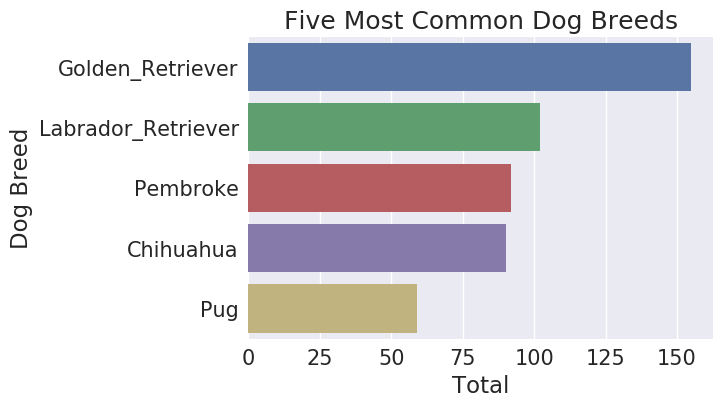

In [82]:
# Plot counts of the 5 most common dog breeds
top_breeds = (twitter_archive_master.breed.value_counts()
              .head(5)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'breed', 'breed': 'total'}))
top_breeds['breed'] = top_breeds['breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='breed', data=top_breeds);
ax.set_title('Five Most Common Dog Breeds');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

#### Observation

> We observe that the Golden_retriever is the most common dog breed in our data set

### Research Question 2

In [83]:
twitter_archive_master.groupby("breed")["retweet_count"].sum().nlargest(15)

breed
golden_retriever      573414
Labrador_retriever    364842
Pembroke              284125
Chihuahua             243403
Samoyed               169366
French_bulldog        152322
cocker_spaniel        142320
pug                   116039
toy_poodle            115768
Pomeranian            112171
chow                  101962
Eskimo_dog             93183
Cardigan               78195
malamute               76854
Lakeland_terrier       73488
Name: retweet_count, dtype: int64

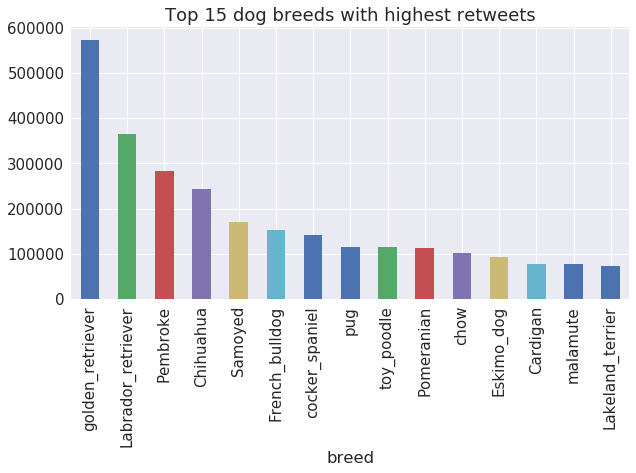

In [84]:
twitter_archive_master.groupby('breed')['retweet_count'].sum().nlargest(15).plot(kind = 'bar', title = 'Top 15 dog breeds with highest retweets', figsize = (10,5));

### Research Question 3

In [85]:
twitter_archive_master["dog_stage"].value_counts()

None            1625
pupper           203
doggo             63
puppo             22
doggo/pupper       9
floofer            7
doggo/puppo        1
Name: dog_stage, dtype: int64

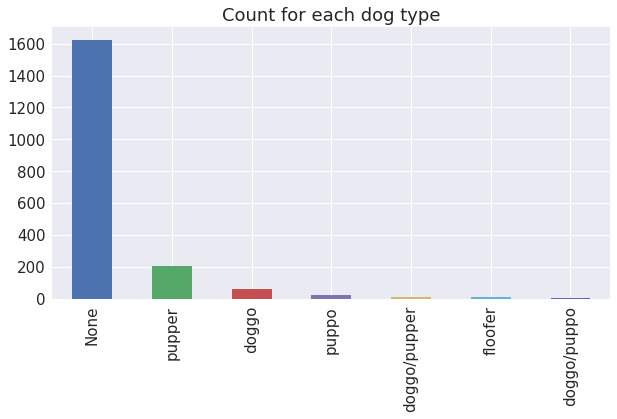

In [86]:
twitter_archive_master['dog_stage'].value_counts().plot(kind='bar', title = 'Count for each dog type', figsize = (10,5));

### Conclusion:

> We observe that the Golden_retriever is the most common dog breed in our data set. We can therefore, infer that Golden_retriever is the most common dog breed that is uploaded to WeRateDogs twiiter page for rating. 

> The golden_retriever is also the breed with the most retweets. With this particular breed being the most common, it is only natural for it to also be the breed with the most engagement on WeRateDogs page.

> Although we have four stages of dogs in our dataset, we do have some dogs belonging to two stages. The pupper appears to be the most reoccuring stage. But we cannot make that inference as we have a lot of tweets where the dog stage were not stated. Therefore, it is impossible to draw accurate conclusions about the overall stages of the dogs.

## Resources


- https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/
- https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/
- https://www.statology.org/pandas-rename-columns/
- https://github.com/siderealsasquatch/udacity-we-rate-dogs-project/blob/master/wrangle_act.ipynb
- https://github.com/paulstancliffe/Udacity-WeRateDogs-Project/blob/master/wrangle_act.ipynb
